In [27]:
import pandas as pd
import numpy as np
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
%pwd

'/Users/manulabricole/Documents/CDN/BDD'

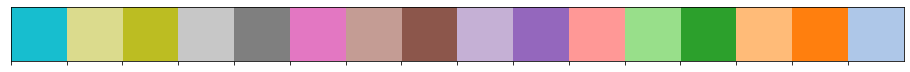

In [29]:
colors = sns.color_palette('rocket', n_colors=12)
colors = sns.color_palette("tab10", n_colors=12)
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

--------

# C3 - S’interfacer avec Python

---

# Import And Query

### Name of the file .db

In [4]:
db_name = 'billboard-200.db'

### Get infos of DB

In [5]:
def get_infos(db_file):
    conn = db.connect(db_file)
    cur = conn.cursor()
    
    # Retrieve the names of all tables in the database
    cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = [table[0] for table in cur.fetchall()]
    
    # Retrieve the columns in each table
    columns = {}
    for table in tables:
        cur.execute("PRAGMA table_info({})".format(table))
        columns[table] = [column[1] for column in cur.fetchall()]
    
    cur.close()
    conn.close()
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    print("--------------- TABLES -----------------")
    print("")
    print("Tables:", tables)
    print("")
    print("--------------- COLUMNS ----------------")
    for table in tables:
        print("")
        print(f"----> {table} <----")
        print("Columns --> ", columns[table])

### Query the DB

In [6]:
# The name has to be in the same folder as the notebook
def query_db(name, query):
    
    conn = db.connect(name)
    cur = conn.cursor()
    cur.execute(query)
    column_names = [description[0] for description in cur.description]
    results = cur.fetchall()
    cur.close()
    conn.close()
    
    df_results = pd.DataFrame(results, columns=column_names)

    return df_results

### Test

In [7]:
query_db(db_name, "SELECT * FROM albums WHERE artist='The Beatles'")

,id,date,artist,album,rank,length,track_length
0,118,2019-01-19,The Beatles,The Beatles [White Album],117,107.0,NaN
1,136,2019-01-19,The Beatles,1,135,27.0,172303.481481
2,139,2019-01-19,The Beatles,Abbey Road,138,17.0,184335.058824
3,282,2019-01-12,The Beatles,The Beatles [White Album],81,107.0,NaN
4,327,2019-01-12,The Beatles,Abbey Road,126,17.0,184335.058824
...,...,...,...,...,...,...,...
2781,564970,1964-02-15,The Beatles,Introducing...The Beatles,22,NaN,NaN
2782,565098,1964-02-15,The Beatles,The Beatles With Tony Sheridan And Their Guests,147,NaN,NaN
2783,565104,1964-02-08,The Beatles,Meet The Beatles!,3,12.0,209922.000000
2784,565160,1964-02-08,The Beatles,Introducing...The Beatles,59,NaN,NaN


# billeboard-200

In [8]:
name = 'billboard-200.db'

In [9]:
get_infos(name)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
--------------- TABLES -----------------

Tables: ['albums', 'acoustic_features']

--------------- COLUMNS ----------------

----> albums <----
Columns -->  ['id', 'date', 'artist', 'album', 'rank', 'length', 'track_length']

----> acoustic_features <----
Columns -->  ['id', 'song', 'album', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'album_id', 'date']


In [10]:
query_db(name, "SELECT * from albums")

,id,date,artist,album,rank,length,track_length
0,1,None,None,None,None,NaN,NaN
1,2,2019-01-19,A Boogie Wit da Hoodie,Hoodie SZN,1,20.0,185233.800000
2,3,2019-01-19,21 Savage,I Am > I Was,2,15.0,211050.733333
3,4,2019-01-19,Soundtrack,Spider-Man: Into The Spider-Verse,3,13.0,190866.384615
4,5,2019-01-19,Meek Mill,Championships,4,19.0,219173.894737
...,...,...,...,...,...,...,...
573942,573943,1963-01-05,The Dave Brubeck Quartet,The Dave Brubeck Quartet At Carnegie Hall,146,12.0,527888.583333
573943,573944,1963-01-05,Woody Herman,Encore: Woody Herman - 1963,147,NaN,NaN
573944,573945,1963-01-05,Lawrence Welk,1963's Early Hits,148,NaN,NaN
573945,573946,1963-01-05,Rusty Warren,Knockers Up!,149,NaN,NaN


### Most week at number 1

In [12]:
query = "\
SELECT album, rank, COUNT(rank) AS count \
FROM albums \
WHERE (rank == 1 AND date > 1999)\
GROUP BY album \
ORDER BY count DESC \
LIMIT 10"

In [13]:
df = query_db(name, query)

In [14]:
df

,album,rank,count
0,21,1,25
1,Views,1,13
2,Frozen,1,13
3,Supernatural,1,12
4,Fearless,1,11
5,1989,1,11
6,Millennium,1,10
7,25,1,10
8,Confessions,1,9
9,Weathered,1,8


### Best album criteria

In [15]:
query = "\
SELECT artist, \
        album, \
        COUNT(rank) AS number_top_200, \
        SUM(rank) AS sum_classement,  \
        (AVG(rank)*1.0 / COUNT(rank)) AS score \
FROM albums \
GROUP BY album \
ORDER BY score ASC \
LIMIT 11"


In [16]:
df = query_db(name, query).dropna()

In [17]:
df

,artist,album,number_top_200,sum_classement,score
1,Tom Petty And The Heartbreakers,Greatest Hits,5905,690596.0,0.019805
2,Original Broadway Cast Recording,Hamilton: An American Musical,171,4027.0,0.137718
3,Ed Sheeran,÷ (Divide),96,1298.0,0.140842
4,Post Malone,Stoney,108,1674.0,0.143519
5,Pink Floyd,The Dark Side Of The Moon,942,133356.0,0.150283
6,Soundtrack,The Sound Of Music,365,20279.0,0.152216
7,Post Malone,beerbongs & bentleys,37,234.0,0.170928
8,Shania Twain,Come On Over,175,5284.0,0.172539
9,Adele,21,412,31265.0,0.184189
10,Soundtrack,The Greatest Showman,56,584.0,0.186224


------

# C4 - S’interfacer avec Pandas

-----

In [18]:
get_infos(name)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
--------------- TABLES -----------------

Tables: ['albums', 'acoustic_features']

--------------- COLUMNS ----------------

----> albums <----
Columns -->  ['id', 'date', 'artist', 'album', 'rank', 'length', 'track_length']

----> acoustic_features <----
Columns -->  ['id', 'song', 'album', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'album_id', 'date']


In [19]:
query = "\
SELECT id, song, album, artist, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, album_id, date \
FROM acoustic_features \
"

In [20]:
df = query_db(name, query)

In [21]:
df = df.set_index("date");
df.index = pd.to_datetime(df.index)

### Moyenne par année

In [34]:
df = df.resample("Y").mean().dropna()
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
date,,,,,,,,,,,,,
1900-12-31,0.038448,0.363750,216361.166667,0.624083,0.000373,6.416667,0.196208,-9.729333,0.666667,0.038833,133.889250,3.833333,0.389500
1933-12-31,0.896780,0.687720,177955.000000,0.278340,0.018708,5.480000,0.197766,-11.930940,0.680000,0.059456,119.815680,3.980000,0.722960
1941-12-31,0.712571,0.456500,181861.000000,0.237207,0.004762,3.714286,0.218300,-13.844214,0.714286,0.048771,104.562929,3.928571,0.361564
1944-12-31,0.941444,0.331889,185583.722222,0.141528,0.024910,5.388889,0.300444,-17.104444,0.777778,0.045033,111.061167,3.555556,0.289772
1946-12-31,0.900937,0.523750,187104.625000,0.271750,0.038312,4.937500,0.167525,-11.483688,0.937500,0.072556,112.294562,3.875000,0.576250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,0.266103,0.532740,235340.950129,0.641605,0.115629,5.247882,0.229030,-8.017984,0.674107,0.091737,120.651579,3.888619,0.441328
2016-12-31,0.280247,0.539637,233214.295504,0.630402,0.101624,5.213537,0.220787,-7.955032,0.675511,0.095675,120.656077,3.873754,0.443337
2017-12-31,0.275792,0.551348,223948.277797,0.630018,0.107876,5.180572,0.217876,-7.919609,0.658986,0.099882,120.301062,3.885301,0.440722


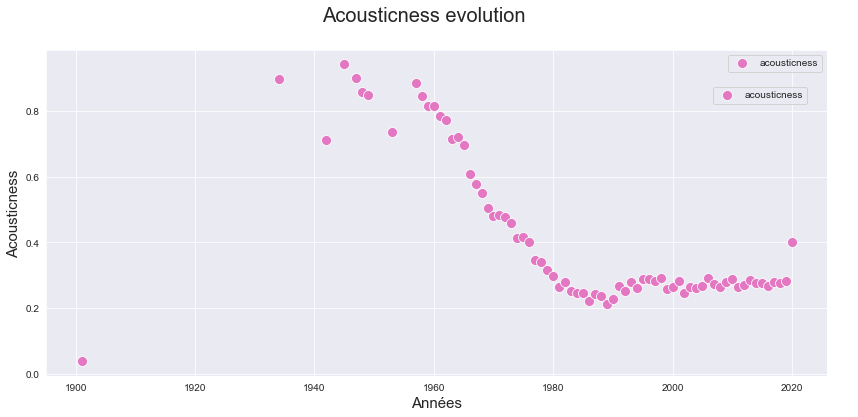

In [38]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Acousticness evolution", fontsize=20)
sns.set_style("darkgrid")
ax = fig.subplots()

ax = sns.scatterplot(
    x=df.index, 
    y=df["acousticness"],
    color=colors[5],
    alpha=1,
    s=100,
    label="acousticness"
)
#ax = sns.lineplot(
#    x=df.index, 
#    y=df["loudness"],
#    color=colors[7], 
#    lw=3,
#    label="loudness"
#)
#ax = sns.lineplot(
#    x=x2, 
#    y=x2*slope2 + intercept2,
#    color=colors[9],
#    lw=3
#)

ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Acousticness", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(loc=(0.83, 0.75))



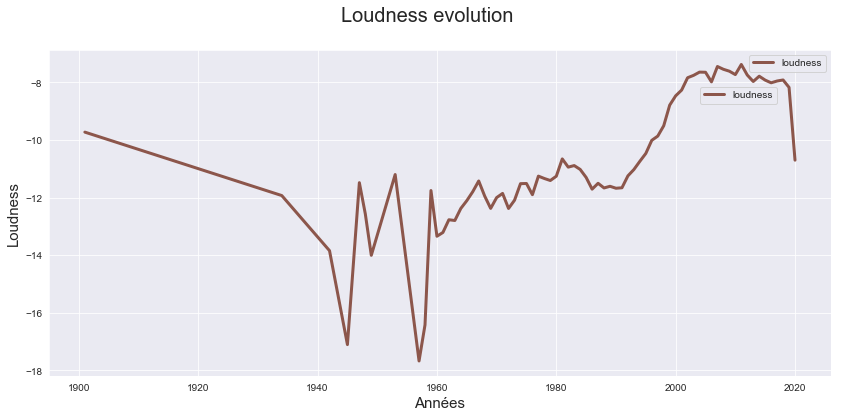

In [39]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Loudness evolution", fontsize=20)
sns.set_style("darkgrid")
ax = fig.subplots()

ax = sns.lineplot(
    x=df.index, 
    y=df["loudness"],
    color=colors[7], 
    lw=3,
    label="loudness"
)
#ax = sns.lineplot(
#    x=x2, 
#    y=x2*slope2 + intercept2,
#    color=colors[9],
#    lw=3
#)

ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Loudness", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(loc=(0.83, 0.75))

No handles with labels found to put in legend.


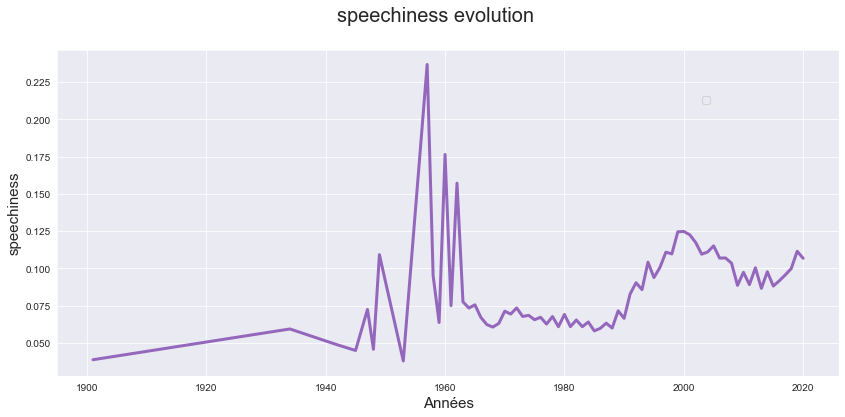

In [43]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("speechiness evolution", fontsize=20)
sns.set_style("darkgrid")
ax = fig.subplots()

ax = sns.lineplot(
    x=df.index, 
    y=df["speechiness"],
    color=colors[9],
    lw=3
)

ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("speechiness", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(loc=(0.83, 0.75))





-----